IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LOADING DATASET

In [2]:
expenditure=pd.read_csv("../Task 4/advertising.csv")


In [3]:
expenditure.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
expenditure.shape

(200, 4)

In [5]:
expenditure.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

DATA CLEANING 

In [6]:
#Checking for null values
expenditure.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

DATA VISUALIZAITONS

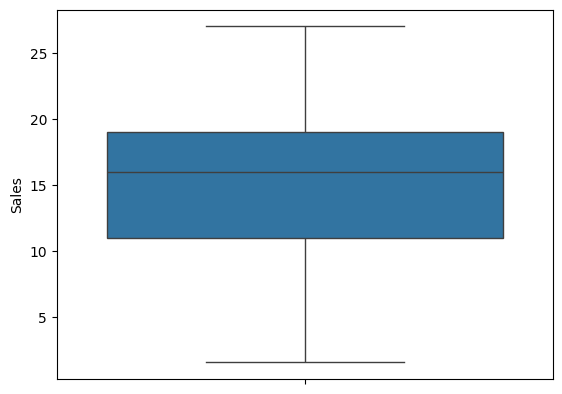

In [7]:
sns.boxplot(expenditure['Sales'])
plt.show()

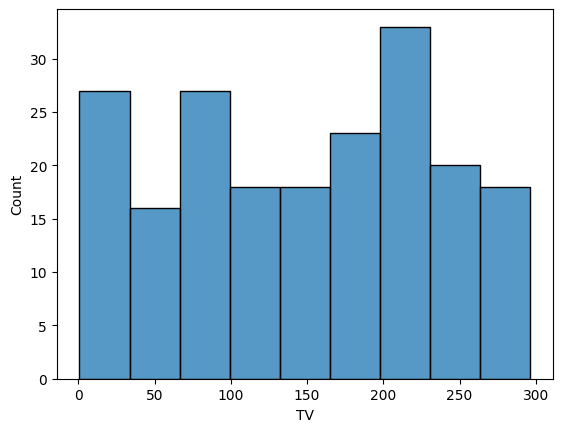

In [8]:
sns.histplot(x='TV', data=expenditure)
plt.show()

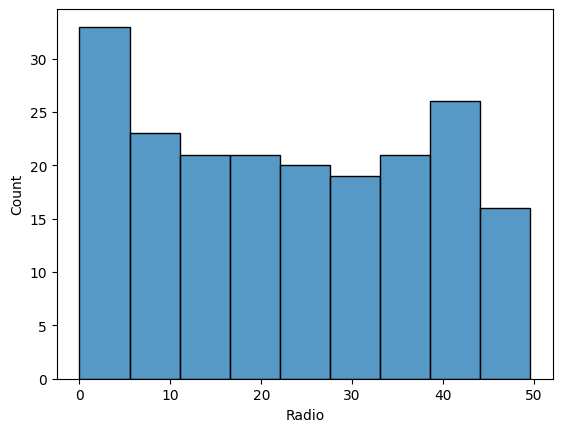

In [9]:
sns.histplot(x='Radio', data=expenditure)
plt.show()

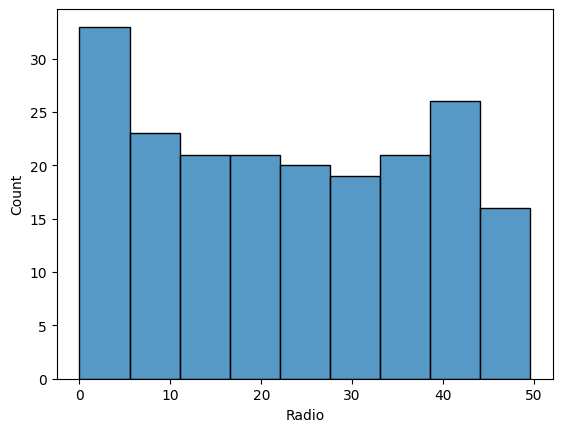

In [10]:
sns.histplot(x='Radio', data=expenditure)
plt.show()

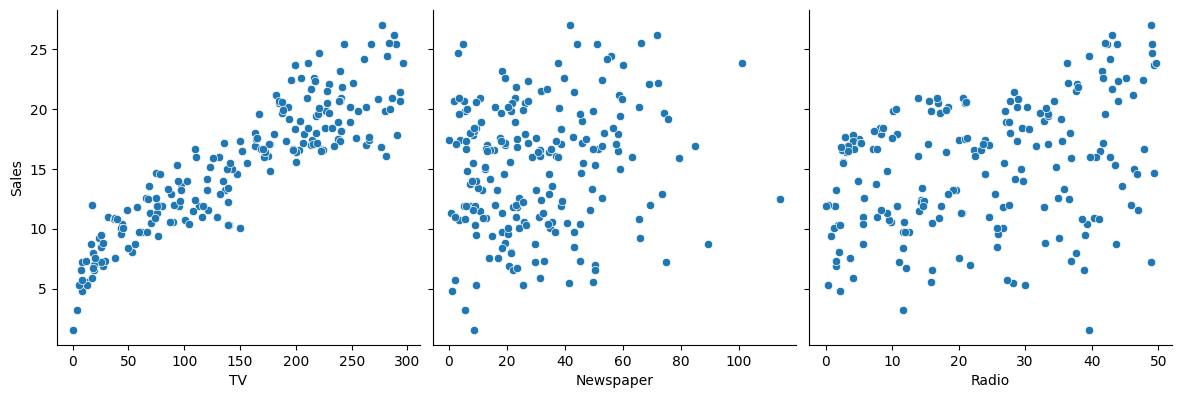

In [11]:
#How Sales are related with other variables using scatter plot.
sns.pairplot(expenditure, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

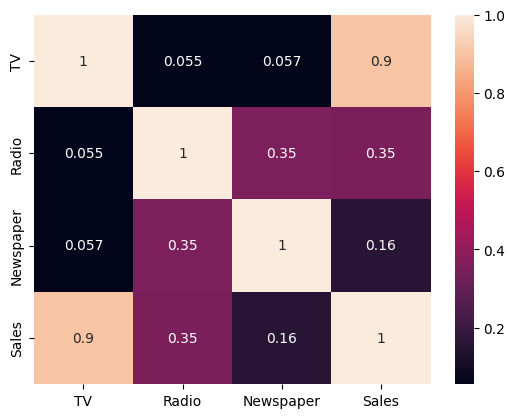

In [12]:
#correlation between different variables.
sns.heatmap(expenditure.corr(), annot=True)
plt.show()

In [13]:
#Assigning feature and response variable 
X=expenditure[['TV', 'Radio', 'Newspaper']]
Y=expenditure['Sales']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [15]:
X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [16]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [17]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [18]:
#model selection
model=LinearRegression()

In [19]:
#Training data
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
#Making predictions on the test data
Y_pred=model.predict(X_test)
Y_pred

array([ 9.35221067, 20.96344625, 16.48851064, 20.10971005, 21.67148354,
       16.16054424, 13.5618056 , 15.39338129, 20.81980757, 21.00537077,
       12.29451311, 20.70848608,  8.17367308, 16.82471534, 10.48954832,
        9.99530649, 16.34698901, 14.5758119 , 17.23065133, 12.56890735,
       18.55715915, 12.12402775, 20.43312609, 17.78017811, 16.73623408,
       21.60387629, 20.13532087, 10.82559967, 19.12782848, 14.84537816,
       13.13597397,  9.07757918, 12.07834143, 16.62824427,  8.41792841,
       14.0456697 ,  9.92050209, 14.26101605, 16.76262961, 17.17185467,
       18.88797595, 15.50165469, 15.78688377, 16.86266686, 13.03405813,
       10.47673934, 10.6141644 , 20.85264977, 10.1517568 ,  6.88471443,
       17.88702583, 18.16013938, 12.55907083, 16.28189561, 18.98024679,
       11.33714913,  5.91026916, 10.06159509, 17.62383031, 13.19628335])

MODEL EVALUATION

In [22]:
#using Mean Squared Error
MSE=mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", MSE)

Mean Squared Error: 2.6360765623280646


In [23]:
#using r2_Score
R2= r2_score(Y_test, Y_pred)
print("R-squared:", R2)

R-squared: 0.8655979373420273


In summary, the model has a relatively low MAE, indicating that it makes accurate predictions on average. Additionally, the high R2 value suggests that the model captures a significant amount of the variability in the sales data. 
In conclusion, while the current model shows promise in predicting sales based on advertising expenditures, further refinement and validation are needed. Future steps could include collecting additional data, exploring different modeling techniques, or incorporating external factors to improve the model's performance

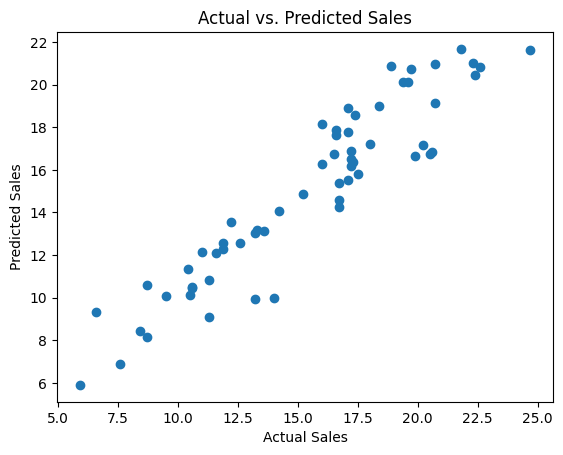

In [24]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()

This scatter plot illustrates the relationship between the actual sales values (Y_test) and the predicted sales values (Y_pred) from our model. This plot visually demonstrates how well the model's predictions align with the actual sales values.